# **Import** **Library** 

In [76]:
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
from matplotlib import pyplot as plt
from google.colab import files

from PIL import Image
from wordcloud import WordCloud
from wordcloud import WordCloud, ImageColorGenerator

import datetime
from IPython.display import Image

# **Import** **Files**

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
CauseDF = pd.read_csv("/content/drive/MyDrive/HCD:ผลิตภัณฑ์บำรุงเส้นผม/ข้อมูล/ใช้/Cause.csv")
OtherBrandDF = pd.read_csv("/content/drive/MyDrive/HCD:ผลิตภัณฑ์บำรุงเส้นผม/ข้อมูล/ใช้/OtherBrand.csv")
ShopeeOrderDF = pd.read_csv("/content/drive/MyDrive/HCD:ผลิตภัณฑ์บำรุงเส้นผม/ข้อมูล/ใช้/Shopee.csv")
FBOrderDF = pd.read_csv("/content/drive/MyDrive/HCD:ผลิตภัณฑ์บำรุงเส้นผม/ข้อมูล/ใช้/FBOrderData.csv")

# **DATA PREPARATION**

### FBOrderDF

In [28]:
FBOrderDF.sample(5)

ตัด Stock ตัดอะไร  ยอดที่ต้องโอน     เลขที่บิล      วันที่   Admin  \
26          2   GIZEL           2090  202112180001  2021-12-18  Admin2   
21          3   GIZEL           2490  202112140001  2021-12-14  Admin2   
41          1   GIZEL           1290  202202090001  2022-02-09  Admin3   
7           1   GIZEL           1290  202112010001  2021-12-01  Admin3   
46          1   GIZEL           1290  202202270001  2022-02-27  Admin3   

     สินค้า โปร   ราคาขาย ช่องทางขาย  ...      เบอร์โทร  \
26  Gizel02  No  2,090.00  Messenger  ...    0954122919   
21  Gizel03  No  2,490.00  Messenger  ...    0613242456   
41  Gizel01  No  1,290.00  Messenger  ...    0814899087   
7   Gizel01  No  1,290.00  Messenger  ...    0818895583   
46  Gizel01  No  1,290.00  Messenger  ...  084-060-0408   

                                              ที่อยู่ รหัสไปรษณีย์   COD?  \
26       186/12  ถ.โคกโตนด. ต.กะรน. อ.เมือง. จ.ภูเก็ต        83100  False   
21    11/61 ม.ปิยะทัศน์ ต.บางพระ อ.เมือง จ.ฉะเชิงเทรา        24000  False   
41  วิทยาลัยป้องกันราชอาณาจักร 64 ถนนวิภาวดีรังสิต...        10400   True   
7   644/173 หมู่บ้านนวกานต์ ซ.2 ถ.เสรีไทย 43 แยก 3...        10240  False   
46  บริษัท พานาโซนิค แมนูแฟคเจอริ่ง อยุธยา จำกัด  ...        13210  False   

   ยอดที่ต้องโอน.1   ยอด COD  จำนวนกล่อง วันที่จัดส่ง     Tracking No  \
26        2,090.00       NaN         2.0   2021-12-18  TH670128VV0X4H   
21        2,490.00       NaN         3.0   2021-12-15  TH240128ATGJ9M   
41             NaN  1,290.00         1.0   2022-02-09  TH01082FXSK63B   
7         1,290.00       NaN         1.0   2021-12-01  TH012626BAR34A   
46        1,290.00       NaN         1.0          NaN             NaN   

    ทำไมยกเลิก  
26         NaN  
21         NaN  
41         NaN  
7          NaN  
46         NaN  

[5 rows x 23 columns]

In [29]:
FBOrderDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ตัด Stock        48 non-null     int64  
 1   ตัดอะไร          48 non-null     object 
 2   ยอดที่ต้องโอน    48 non-null     int64  
 3   เลขที่บิล        48 non-null     int64  
 4   วันที่           48 non-null     object 
 5   Admin            48 non-null     object 
 6   สินค้า           48 non-null     object 
 7   โปร              48 non-null     object 
 8   ราคาขาย          48 non-null     object 
 9   ช่องทางขาย       48 non-null     object 
 10  ชื่อ FB / LINE   48 non-null     object 
 11  ผู้แนะนำ         48 non-null     object 
 12  ชื่อ             48 non-null     object 
 13  เบอร์โทร         48 non-null     object 
 14  ที่อยู่          48 non-null     object 
 15  รหัสไปรษณีย์     48 non-null     int64  
 16  COD?             48 non-null     bool   
 17  ยอดที่ต้องโอน.1  3

เปลี่ยนชื่อคอลัมน์เพื่อให้ง่ายต่อการเรียกใช้งาน

In [30]:
FBOrderDF.rename(columns={'ราคาขาย':'Total'},inplace=True)
FBOrderDF.rename(columns={'วันที่':'Date'},inplace=True)
FBOrderDF.rename(columns={'โปร':'Promotion'},inplace=True)
FBOrderDF.rename(columns={'รหัสไปรษณีย์':'PostalCode'},inplace=True)
FBOrderDF.rename(columns={'จำนวนกล่อง':'amount'},inplace=True)
FBOrderDF.rename(columns={'ช่องทางขาย':'SocialM'},inplace=True)

In [31]:
FBOrderDF.describe()

ตัด Stock  ยอดที่ต้องโอน     เลขที่บิล    PostalCode     amount  \
count  48.000000      48.000000  4.800000e+01     48.000000  48.000000   
mean    2.062500    1949.791667  2.021456e+11  33283.333333   2.062500   
std     0.998003     662.896576  4.394943e+07  26570.270888   0.998003   
min     1.000000     990.000000  2.021112e+11  10170.000000   1.000000   
25%     1.000000    1290.000000  2.021120e+11  10377.500000   1.000000   
50%     2.000000    2090.000000  2.021122e+11  19205.000000   2.000000   
75%     3.000000    2490.000000  2.022012e+11  53357.500000   3.000000   
max     4.000000    3960.000000  2.022023e+11  90000.000000   4.000000   

       ทำไมยกเลิก  
count         0.0  
mean          NaN  
std           NaN  
min           NaN  
25%           NaN  
50%           NaN  
75%           NaN  
max           NaN

จากการคำนวณค่าถิติเบื้องต้น จะมีบางคอลลัมน์ เช่น ข้อมูลรหัสไปรษณี จะถูกนำมาคำนวณด้วย ซึ่งในการใช้งานเราไม่จำเป็นต้องคำนวณข้อมูลที่เป็น category ดังนั้นจึงทำการเปลี่ยนประเภทของข้อมูลเหล่านี้ จาก int64 เป็น category

In [32]:
FBOrderDF.Date = FBOrderDF.Date.astype('category')
FBOrderDF.PostalCode  = FBOrderDF.PostalCode.astype('category')

In [33]:
FBOrderDF.isnull().sum()

ตัด Stock           0
ตัดอะไร             0
ยอดที่ต้องโอน       0
เลขที่บิล           0
Date                0
Admin               0
สินค้า              0
Promotion           0
Total               0
SocialM             0
ชื่อ FB / LINE      0
ผู้แนะนำ            0
ชื่อ                0
เบอร์โทร            0
ที่อยู่             0
PostalCode          0
COD?                0
ยอดที่ต้องโอน.1    16
ยอด COD            32
amount              0
วันที่จัดส่ง        3
Tracking No         2
ทำไมยกเลิก         48
dtype: int64

ข้อมูลใน FBOrderDF มีคอลัมน์ที่พบ missing values คือ ยอดที่ต้องโอน,ยอด COD และ Tracking No เนื่องจากคอลัมน์เหล่านี้เราไม่จำเป็นต้องนำมาใช้ในการวิเคราะห์อยู่แล้ว จึงเลือกจัดการกับข้อมูลส่วนนี้ด้วยการลบคอลัมน์ทิ้ง

In [34]:
FBOrderDF.dropna(axis='columns',inplace=True)

สร้างลิสต์เก็บชื่อคอลัมน์ที่จะลบออกเนื่องจากมีคอลลัมน์เยอะ จึงจะทำการลบคอลัมน์ที่ไม่ต้องการใช้งานออก

In [35]:
todropFBOrderDF = ['ตัด Stock', 'ตัดอะไร', 'เลขที่บิล','สินค้า','ชื่อ FB / LINE', 'ชื่อ', 'เบอร์โทร', 'ที่อยู่','ยอดที่ต้องโอน','ผู้แนะนำ','COD?']

In [36]:
FBOrderDF.drop(columns=todropFBOrderDF,inplace=True)
FBOrderDF.sample(5)

Date   Admin Promotion     Total    SocialM PostalCode  amount
30  2022-01-03  Admin2        No  2,490.00  Messenger      41000     3.0
44  2022-02-18  Admin3        No  2,490.00  Messenger      14110     3.0
35  2022-01-15  Admin2        No  2,490.00    LINE OA      10310     3.0
10  2021-12-02  Admin2        No  2,490.00  Messenger      13220     3.0
31  2022-01-04  Admin2        No  1,290.00  Messenger      10240     1.0

เมื่อลบแล้วจะเหลือคอลัมน์ตามที่แสดงข้างบนที่เราจะนำไปใช้ในการวิเคราะห์

In [37]:
FBOrderDF.dtypes

Date          category
Admin           object
Promotion       object
Total           object
SocialM         object
PostalCode    category
amount         float64
dtype: object

### ShopeeOrderDF

In [38]:
ShopeeOrderDF.sample(5)

หมายเลขคำสั่งซื้อ สถานะการสั่งซื้อ เหตุผลในการยกเลิกคำสั่งซื้อ  \
27    220219VHQNA9D0       สำเร็จแล้ว                         NaN   
50    2203150YUFWE6G       สำเร็จแล้ว                         NaN   
46    220314UF7VXNTA       สำเร็จแล้ว                         NaN   
23    220219UP9M03E1       สำเร็จแล้ว                         NaN   
16    220218SPM2A2GQ       สำเร็จแล้ว                         NaN   

    สถานะการคืนเงินหรือคืนสินค้า ชื่อผู้ใช้ (ผู้ซื้อ) วันที่ทำการสั่งซื้อ  \
27                           NaN           chariswu17    2022-02-19 21:45   
50                           NaN       phetladda.1990    2022-03-15 16:03   
46                           NaN            bluestms_    2022-03-14 15:01   
23                           NaN           mook_devil    2022-02-19 13:34   
16                           NaN             2ndscene    2022-02-18 18:34   

   เวลาการชำระสินค้า            ช่องทางการชำระเงิน  \
27  2022-02-19 21:45  ShopeePay - ยอดเงินใน Wallet   
50  2022-03-15 16:03                     SPayLater   
46  2022-03-14 15:21     โอน/ชำระผ่านช่องทางธนาคาร   
23  2022-02-19 13:34  ShopeePay - ยอดเงินใน Wallet   
16  2022-02-18 18:34  ShopeePay - ยอดเงินใน Wallet   

    ช่องทางการชำระเงิน (รายละเอียด)_1 ช่องทางการชำระเงิน (รายละเอียด)_2  ...  \
27                                NaN                  Airpay Wallet V2  ...   
50                                NaN                 Shopee Credit x12  ...   
46                                NaN                     Bank Transfer  ...   
23                                NaN                  Airpay Wallet V2  ...   
16                                NaN                  Airpay Wallet V2  ...   

   หมายเลขโทรศัพท์ หมายเหตุจากผู้ซื้อ  \
27        ******53                NaN   
50        ******12                NaN   
46        ******56                NaN   
23        ******97                NaN   
16        ******69                NaN   

                                   ที่อยู่ในการจัดส่ง ประเทศ  \
27  ******อ.ถลาง จ.ภูเก็ต 83110 อำเภอถลาง จังหวัดภ...     TH   
50  ******กชลบุรี สาขา ถนนสาย 331 ต.บ่อวิน อำเภอศร...     TH   
46  ****** อ.เมืองสมุทรสาคร จ.สมุทรสาคร อำเภอเมือง...     TH   
23  ******ราชพฤกษ์ แขวงปากคลองภาษีเจริญ เขตภาษีเจร...     TH   
16  ******า ถนน วิภาวดีรังสิต แขวง ลาดยาว เขตจตุจั...     TH   

                 จังหวัด            เขต/อำเภอ  รหัสไปรษณีย์ ประเภทคำสั่งซื้อ  \
27         จังหวัดภูเก็ต            อำเภอถลาง         83110              NaN   
50         จังหวัดชลบุรี         อำเภอศรีราชา         20230              NaN   
46      จังหวัดสมุทรสาคร  อำเภอเมืองสมุทรสาคร         74000              NaN   
23  จังหวัดกรุงเทพมหานคร         เขตภาษีเจริญ         10160              NaN   
16  จังหวัดกรุงเทพมหานคร           เขตจตุจักร         10900              NaN   

    เวลาที่ทำการสั่งซื้อสำเร็จ บันทึก  
27            2022-02-26 08:40    NaN  
50            2022-03-17 22:49    NaN  
46            2022-03-19 07:12    NaN  
23            2022-02-22 01:33    NaN  
16            2022-02-24 08:08    NaN  

[5 rows x 54 columns]

In [39]:
ShopeeOrderDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 54 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   หมายเลขคำสั่งซื้อ                    75 non-null     object 
 1   สถานะการสั่งซื้อ                     75 non-null     object 
 2   เหตุผลในการยกเลิกคำสั่งซื้อ          5 non-null      object 
 3   สถานะการคืนเงินหรือคืนสินค้า         0 non-null      float64
 4   ชื่อผู้ใช้ (ผู้ซื้อ)                 75 non-null     object 
 5   วันที่ทำการสั่งซื้อ                  75 non-null     object 
 6   เวลาการชำระสินค้า                    75 non-null     object 
 7   ช่องทางการชำระเงิน                   75 non-null     object 
 8   ช่องทางการชำระเงิน (รายละเอียด)_1    0 non-null      float64
 9   ช่องทางการชำระเงิน (รายละเอียด)_2    75 non-null     object 
 10  ค่าธรรมเนียม (%)                     75 non-null     object 
 11  ตัวเลือกการจัดส่ง                 

In [40]:
ShopeeOrderDF.rename(columns={'วันที่ทำการสั่งซื้อ':'Date'},inplace=True)
ShopeeOrderDF.rename(columns={'รหัสไปรษณีย์':'PostalCode'},inplace=True)
ShopeeOrderDF.rename(columns={'จำนวน':'amount'},inplace=True)
ShopeeOrderDF.rename(columns={'ราคาขายสุทธิ':'Total'},inplace=True)

In [41]:
ShopeeOrderDF.describe()

สถานะการคืนเงินหรือคืนสินค้า  ช่องทางการชำระเงิน (รายละเอียด)_1  \
count                           0.0                                0.0   
mean                            NaN                                NaN   
std                             NaN                                NaN   
min                             NaN                                NaN   
25%                             NaN                                NaN   
50%                             NaN                                NaN   
75%                             NaN                                NaN   
max                             NaN                                NaN   

       เลขอ้างอิง Parent SKU  เลขอ้างอิง SKU (SKU Reference No.)  ราคาตั้งต้น  \
count                    0.0                                 0.0    75.000000   
mean                     NaN                                 NaN  2484.800000   
std                      NaN                                 NaN  1327.216514   
min                      NaN                                 NaN   960.000000   
25%                      NaN                                 NaN  1590.000000   
50%                      NaN                                 NaN  1590.000000   
75%                      NaN                                 NaN  3180.000000   
max                      NaN                                 NaN  4770.000000   

           ราคาขาย  amount        Total  ส่วนลดจาก Shopee  \
count    75.000000    75.0    75.000000              75.0   
mean   1615.200000     1.0  1615.200000               0.0   
std     570.661328     0.0   570.661328               0.0   
min     535.000000     1.0   535.000000               0.0   
25%    1290.000000     1.0  1290.000000               0.0   
50%    1290.000000     1.0  1290.000000               0.0   
75%    2090.000000     1.0  2090.000000               0.0   
max    2490.000000     1.0  2490.000000               0.0   

       โค้ดส่วนลดชำระโดยผู้ขาย  ...  ค่าจัดส่งที่ชำระโดยผู้ซื้อ  \
count                75.000000  ...                        75.0   
mean                609.333333  ...                         0.0   
std                 812.374453  ...                         0.0   
min                   0.000000  ...                         0.0   
25%                   0.000000  ...                         0.0   
50%                   0.000000  ...                         0.0   
75%                1190.000000  ...                         0.0   
max                2390.000000  ...                         0.0   

       ค่าจัดส่งที่ Shopee ออกให้โดยประมาณ  ค่าจัดส่งสินค้าคืน  ค่าบริการ  \
count                                 75.0                75.0       75.0   
mean                                   0.0                 0.0        0.0   
std                                    0.0                 0.0        0.0   
min                                    0.0                 0.0        0.0   
25%                                    0.0                 0.0        0.0   
50%                                    0.0                 0.0        0.0   
75%                                    0.0                 0.0        0.0   
max                                    0.0                 0.0        0.0   

       จำนวนเงินทั้งหมด  ค่าจัดส่งโดยประมาณ  หมายเหตุจากผู้ซื้อ    PostalCode  \
count         75.000000                75.0                 0.0     75.000000   
mean         874.360000                 0.0                 NaN  30642.266667   
std          867.196908                 0.0                 NaN  27335.190050   
min            0.000000                 0.0                 NaN  10150.000000   
25%          100.000000                 0.0                 NaN  10525.000000   
50%          920.000000                 0.0                 NaN  12120.000000   
75%         1290.000000                 0.0                 NaN  53670.000000   
max         2490.000000                 0.0                 NaN  90110.000000   

       ประเภทคำสั่งซื้อ  บันทึก 

In [42]:
ShopeeOrderDF.PostalCode = ShopeeOrderDF.PostalCode.astype('category')

In [43]:
ShopeeOrderDF.isnull().sum()

หมายเลขคำสั่งซื้อ                       0
สถานะการสั่งซื้อ                        0
เหตุผลในการยกเลิกคำสั่งซื้อ            70
สถานะการคืนเงินหรือคืนสินค้า           75
ชื่อผู้ใช้ (ผู้ซื้อ)                    0
Date                                    0
เวลาการชำระสินค้า                       0
ช่องทางการชำระเงิน                      0
ช่องทางการชำระเงิน (รายละเอียด)_1      75
ช่องทางการชำระเงิน (รายละเอียด)_2       0
ค่าธรรมเนียม (%)                        0
ตัวเลือกการจัดส่ง                       0
วิธีการจัดส่ง                           5
*หมายเลขติดตามพัสดุ                     5
วันที่คาดว่าจะทำการจัดส่งสินค้า         3
เวลาส่งสินค้า                           5
เลขอ้างอิง Parent SKU                  75
ชื่อสินค้า                              0
เลขอ้างอิง SKU (SKU Reference No.)     75
ชื่อตัวเลือก                           14
ราคาตั้งต้น                             0
ราคาขาย                                 0
amount                                  0
Total                             

In [44]:
ShopeeOrderDF.dropna(axis='columns',inplace=True)

In [45]:
todropShopeeOrderDF = ['หมายเลขคำสั่งซื้อ', 'สถานะการสั่งซื้อ', 'ชื่อผู้ใช้ (ผู้ซื้อ)','เวลาการชำระสินค้า', 'ช่องทางการชำระเงิน', 'ช่องทางการชำระเงิน (รายละเอียด)_2', 'ค่าธรรมเนียม (%)','ตัวเลือกการจัดส่ง', 'ชื่อสินค้า','ส่วนลดจาก Shopee', 'โค้ดส่วนลดชำระโดยผู้ขาย',
       'โค้ด Coins Cashback', 'โค้ดส่วนลดชำระโดย Shopee', 'เข้าร่วมแคมเปญ bundle deal หรือไม่', 'ส่วนลด bundle deal ชำระโดยผู้ขาย', 'ส่วนลด bundle deal ชำระโดย Shopee',  'ส่วนลดจากการใช้เหรียญ', 'ส่วนลดทั้งหมดจากบัตรเครดิต', 'ค่าคอมมิชชั่น',
       'Transaction Fee', 'ต้นทุนขายหักคูปองและcoin',  'ค่าจัดส่งที่ชำระโดยผู้ซื้อ', 'ค่าจัดส่งที่ Shopee ออกให้โดยประมาณ',  'ค่าจัดส่งสินค้าคืน', 'ค่าบริการ','ค่าจัดส่งโดยประมาณ', 'ชื่อผู้รับ', 'หมายเลขโทรศัพท์', 'ที่อยู่ในการจัดส่ง', 'ประเทศ', 'จังหวัด', 'เขต/อำเภอ','ราคาตั้งต้น','ราคาขาย','จำนวนเงินทั้งหมด']

In [46]:
ShopeeOrderDF.drop(columns=todropShopeeOrderDF,inplace=True)
ShopeeOrderDF.sample(5)

Date  amount   Total PostalCode
2   2022-02-18 15:17       1  1290.0      65150
62  2022-04-02 10:21       1  2490.0      83100
0   2022-02-17 21:10       1  1290.0      83100
55  2022-03-21 02:09       1  2490.0      10150
71  2022-04-24 15:46       1  1290.0      10230

In [47]:
ShopeeOrderDF.dtypes

Date            object
amount           int64
Total          float64
PostalCode    category
dtype: object

### CauseDF

In [48]:
CauseDF.sample(5)


วันที่           Facebook   สาเหตุที่ไม่ซื้อ เวลาทัก  \
89    9-มี.ค.-22   Tiwabhorn Nakbhan   รู้ราคาแล้วหายไป   19.27   
68   11-มี.ค.-22       Ananya Phusuk  ทักมาแล้วหายไปเลย   12.23   
146    9-มี.ค.-22         เมจัง อิอิ  ทักมาแล้วหายไปเลย    7.35   
105   14-มี.ค.-22     ยีสิบเอ็ด มีนา         ร้านไม่ตอบ     NaN   
47     9-มี.ค.-22      LadyNice Jina  ทักมาแล้วหายไปเลย   16.36   

     เวลาร้านตอบกลับ  difference  tRespond  
89             19.27        0.00      0.00  
68             16.48       -4.25      4.25  
146            11.25      -27.90     27.90  
105              NaN         NaN       NaN  
47             16.36        0.00      0.00

In [49]:
CauseDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   วันที่            150 non-null    object 
 1   Facebook          150 non-null    object 
 2   สาเหตุที่ไม่ซื้อ  150 non-null    object 
 3   เวลาทัก           144 non-null    object 
 4   เวลาร้านตอบกลับ   144 non-null    float64
 5   difference        144 non-null    float64
 6   tRespond          144 non-null    float64
dtypes: float64(3), object(4)
memory usage: 8.3+ KB


In [50]:
CauseDF.rename(columns={'วันที่':'Date'},inplace=True)
CauseDF.rename(columns={'สาเหตุที่ไม่ซื้อ':'Cause'},inplace=True)
CauseDF.rename(columns={'เวลาทัก':'Stime'},inplace=True)
CauseDF.rename(columns={'เวลาร้านตอบกลับ':'Rtime'},inplace=True)

In [51]:
CauseDF.describe()

Rtime  difference    tRespond
count  144.000000  144.000000  144.000000
mean    14.598542   -3.228194    3.233750
std      5.259090    6.512493    6.509717
min      0.460000  -37.040000    0.000000
25%     10.510000   -2.447500    0.000000
50%     15.230000   -0.115000    0.155000
75%     19.255000    0.000000    2.447500
max     23.270000    0.400000   37.040000

In [52]:
CauseDF.Date = CauseDF.Date.astype('category')
CauseDF.Facebook = CauseDF.Facebook.astype('category')
CauseDF.Cause = CauseDF.Cause.astype('category')

In [53]:
CauseDF.isnull().sum()

Date          0
Facebook      0
Cause         0
Stime         6
Rtime         6
difference    6
tRespond      6
dtype: int64

คอลัมน์ที่มีค่า null คือข้อมูลที่ร้านค้าไม่มีการตอบกลับ และยังเป็นข้อมูลส่วนน้อยเลยไม่มีการตัดทิ้ง

In [54]:
todropCauseDF = ['Facebook','difference']

In [55]:
CauseDF.drop(columns=todropCauseDF,inplace=True)
CauseDF.sample(5)

Date              Cause  Stime  Rtime  tRespond
115  15-มี.ค.-22   ทักมาแล้วหายไปเลย  15.58  15.18      0.40
51     8-มี.ค.-22   รู้ราคาแล้วหายไป  12.51  12.51      0.00
35     4-มี.ค.-22   รู้ราคาแล้วหายไป  10.21  10.22      0.01
40    9-มี.ค.-22   ทักมาแล้วหายไปเลย   5.14   7.42      2.28
91     8-มี.ค.-22  ทักมาแล้วหายไปเลย  20.41  20.41      0.00

In [56]:
CauseDF.dtypes

Date        category
Cause       category
Stime         object
Rtime        float64
tRespond     float64
dtype: object

### OtherBrandDF

In [57]:
OtherBrandDF.head(5)

ชื่อเพจ                                            จุดเด่น  \
0       A          ขายอาหารเสริมที่หลากหลายตั้งแต่หัวจรดเท้า   
1       B   มีหน้าร้าน น่าจะเน้นขายหน้าร้านมากกว่าทางออนไลน์   
2       C                   เน้นขายในช็อปปี้และตัวแทนจำหน่าย   
3       D  น้นขายในช็อปปี้และตัวแทนจำหน่าย ขายอาหารเสริมท...   
4       E                                  ขายถูก กระปุกเล็ก   

                                  ผลิตภัณฑ์  ราคาเฉลี่ย(บาท)  คนกดไลค์  \
0             UNC YOUR BEGIN  เป็นชนิดทาน\r             1500      3359   
1  เซรั่มบำรุงผม, อาหารเสริมบำรุงผมชนิดทาน              1240      4384   
2          อาหารเสริมบำรุงผมชนิดทาน, สเปร์ย             1240      4270   
3                  อาหารเสริมบำรุงผมชนิดทาน              790      1846   
4                              เซรั่มหมักผม               50       636   

   เฟสบุ๊คการันตรีว่าตอบเร็ว  ทุก10 โพสคนแสดงความเห็น ทุก10 โพสคนกดไลค์  
0                          1                        1              5-13  
1                          0                        0               1-4  
2                          0                        0               1-2  
3                          0                        0               2-5  
4                          1                        0               2-4

In [58]:
OtherBrandDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ชื่อเพจ                    7 non-null      object
 1   จุดเด่น                    7 non-null      object
 2   ผลิตภัณฑ์                  7 non-null      object
 3   ราคาเฉลี่ย(บาท)            7 non-null      int64 
 4   คนกดไลค์                   7 non-null      int64 
 5   เฟสบุ๊คการันตรีว่าตอบเร็ว  7 non-null      int64 
 6   ทุก10 โพสคนแสดงความเห็น    7 non-null      int64 
 7   ทุก10 โพสคนกดไลค์          7 non-null      object
dtypes: int64(4), object(4)
memory usage: 576.0+ bytes


In [59]:
OtherBrandDF.rename(columns={'ชื่อเพจ':'PageName'},inplace=True)
OtherBrandDF.rename(columns={'จุดเด่น':'Highlights'},inplace=True)
OtherBrandDF.rename(columns={'ผลิตภัณฑ์':'Product'},inplace=True)
OtherBrandDF.rename(columns={'ราคาเฉลี่ย(บาท)':'Price'},inplace=True)
OtherBrandDF.rename(columns={'คนกดไลค์':'PLike'},inplace=True)
OtherBrandDF.rename(columns={'เฟสบุ๊คการันตรีว่าตอบเร็ว':'Guarantee'},inplace=True)
OtherBrandDF.rename(columns={'ทุก10 โพสคนแสดงความเห็น':'CM'},inplace=True)
OtherBrandDF.rename(columns={'ทุก10 โพสคนกดไลค์':'Like'},inplace=True)

In [60]:
OtherBrandDF.PageName = OtherBrandDF.PageName.astype('category')

In [61]:
OtherBrandDF.isnull().sum()

PageName      0
Highlights    0
Product       0
Price         0
PLike         0
Guarantee     0
CM            0
Like          0
dtype: int64

In [62]:
OtherBrandDF.describe()

Price         PLike  Guarantee        CM
count     7.000000      7.000000   7.000000  7.000000
mean    837.142857  12730.857143   0.571429  0.142857
std     537.392293  26807.016273   0.534522  0.377964
min      50.000000    636.000000   0.000000  0.000000
25%     520.000000   1517.500000   0.000000  0.000000
50%     790.000000   3359.000000   1.000000  0.000000
75%    1240.000000   4327.000000   1.000000  0.000000
max    1500.000000  73432.000000   1.000000  1.000000

In [63]:
OtherBrandDF.dtypes

PageName      category
Highlights      object
Product         object
Price            int64
PLike            int64
Guarantee        int64
CM               int64
Like            object
dtype: object

In [64]:
#OtherBrandDF.plot()

# **Data Visualization**

In [65]:
#ADMIN
AM = FBOrderDF.pivot_table(index=['Admin'], values=['amount'], aggfunc='sum')
AM.sort_values(['amount'], ascending=False).plot.bar()
plt.xlabel('Admin',color='g')
plt.ylabel('Amount',color='g')
#plt.grid(linestyle='--',axis='y')
plt.title('Sales')
#AM.plot.bar()
AM

amount
Admin         
Admin1     6.0
Admin2    65.0
Admin3    28.0

ในการขายสินค้าปัจจัยหนึ่งที่ทำให้ปิดการขายได้ก็มาจากการตอบคำถามหรือให้ข้อมูลของสินค้าแก่ลูกค้าของพนักงานขาย ในส่วนของช่องทางการขายผ่านเพจเฟสบุ๊คจะเห็นได้ว่าเพจนี้มี admin 3 คนที่คอยดูแลลูกค้า จึงนำข้อมูลในคอลัมน์ amount ซึ่งเป็นยอดสินค้า(กล่อง) มาเปรียบเทียบดูว่าแต่ละคนขายได้เท่าไร โดยจะเป็นข้อมูลการขายตั้งแต่ เดือนพฤศจิกายน ปี 2021 - เดือนกุมภาพันธ์ ปี 2022 พบว่าแอดมินคนที่1 ขายได้ 6 กล่อง แอดมินคนที่2 ขายได้ 65 กล่อง และแอดมินคนที่ 3 ขายได้ 28 กล่อง จากข้อมูลที่เห็นผู้ประกอบการสามารถย้อนกลับไปดูการทำงานของพนักงานขายต่อได้ ว่าคนที่ขายได้มากเป็นเพราะอะไร คนที่ขายได้น้อยเป็นเพราะอะไรแล้วปรับปรุงแกแ้ไขในส่วนของการให้บริการกันต่อ

นอกเหนือจากการให้บริการข้อมูลแก่ลูกค้าแล้วอีกปัจจัยที่คิดว่าน่าจะมีผลต่อยอดขายคือโปรโมชั่นขอสินค้า อาจเป็นไปได้ว่าช่วงที่มีโปรโมชั่นตรงกับช่วงที่แอดมินคนที่ 2 ดูแลเพจอยู่ จึงทำให้มียอดขายเยอะกว่าคนอื่น เราจึงนำข้อมูลจากคอลัมน์ Promotion ซึ่งจะมีข้อมูลบ่งบอกว่าออร์เดอร์ที่ลูกค้าสั่งไปมีโปรโมชั่นหรือไม่มี กับอีกคอลลัมน์ก็คือ amount เพื่อจะได้ทราบว่าโปรโมชั่นมีผลต่อการซื้อของลูกค้าหรือไม่

amount
Promotion        
Admin1        6.0
No           93.0

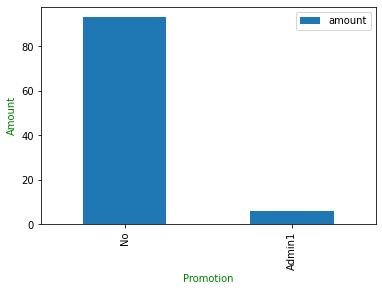

In [66]:
#PROMOTION
PM = FBOrderDF.pivot_table(index=['Promotion'], values=['amount'], aggfunc='sum')
PM.sort_values('amount', ascending=False).plot.bar()
plt.xlabel('Promotion',color='g')
plt.ylabel('Amount',color='g')
#plt.grid(linestyle='--',axis='y')
#PM.plot.bar()
PM


จะเห็นได้ว่าช่วงที่มีโปรโมชั่น (ซึ่งเป็นช่วงที่แอดมินคนที่ 1 ดูแล) ยอดขายยังน้อยกว่าช่วงที่ขายปกติอยู่ดี ดังนั้นการมีโปรโมชั่นหรือไม่มีจึงไม่ได้ส่งผลกระทบต่อการตัดสินใจซื้อของลูกค้า

In [67]:
#social media
scm = FBOrderDF.pivot_table(index=['SocialM'], values=['amount'], aggfunc='sum')
scm.sort_values('amount', ascending=False).plot.bar()
plt.xlabel('Social media',color='g')
plt.ylabel('Amount',color='g')
#plt.grid(linestyle='--',axis='y')
#scm.plot.bar()
scm

amount
SocialM          
LINE OA      19.0
Messenger    80.0

ต่อมาจะเป็นการวิเคราะห์ว่ากลุ่มลูกค้ามาจากไหนบ้าง ซึ่งร้านมีการขายจากหลายช่องทางไม่ว่าจะเป็น Facebook Page,Line OA,IG และ Twitter แต่ช่องทางที่ลูกค้าติดต่อเพื่อมาซื้อสินค้ามากที่สุด ได้แก่ Facebook Page รองลงมาก็คือ Line OA แต่ยังมีอีกช่องทางหนึ่งที่จะแยกออกไปวิเคราะห์ต่างหากคือ shopee เนื่องจากเป็นช่องทางที่ต่างจากที่กล่าวไปข้างต้น เพราะเป็นการซื้อที่ลูกค้าสามารถตัดสินใจได้เลยไม่ต้องรอโต้ตอบกับแอดมิน

In [78]:
#สาเหตุที่ลูกค้าไม่ซื้อ(จากการแชท)
Image(filename="/content/drive/MyDrive/HCD:ผลิตภัณฑ์บำรุงเส้นผม/ข้อมูล/ใช้/c.png")

เหตุผลหลักๆที่ลูกค้าทักมาแล้วไม่ซื้อจะมีเรื่องการสอบถามราคา ขอดูรีวิว ข้อมูลสินค้า ซึ่งสิ่งเหล่านี้เป็นสิ่งที่พอเข้าใจได้เนื่องจากปัญหาด้านเส้นผมแต่ละคนที่แตกต่างกัน ลูกคาอาจจะเจอผลิตภัณฑ์อื่นที่ตอบโจทย์มากกว่า รวมถึงเรื่องราคา แต่เหตุผลที่เยอะที่สุดคือลูกค้าทักมาสอบถามแล้วหายไปแล้วไม่กลับมาตอบอีกหลังจากแอดมินตอบ 

การที่ลูกค้าทักมาแล้วหายไปเป็นสิ่งที่น่าสนใจว่าอะไรที่ทำให้เกิดเหตุการณ์แบบนั้น ข้อมูลที่เราสามารถหาได้เพิ่มเติมจากในแชทคือเรื่องของระยะเวลาในการที่ลูกค้าทักเข้ามาและระยะเวลาที่แอดมินตอบกลับไป เราจึงมีการนำส่วนต่างของเวลามาดูว่าลูกค้าใช้เวลาเท่าไรในการรอ

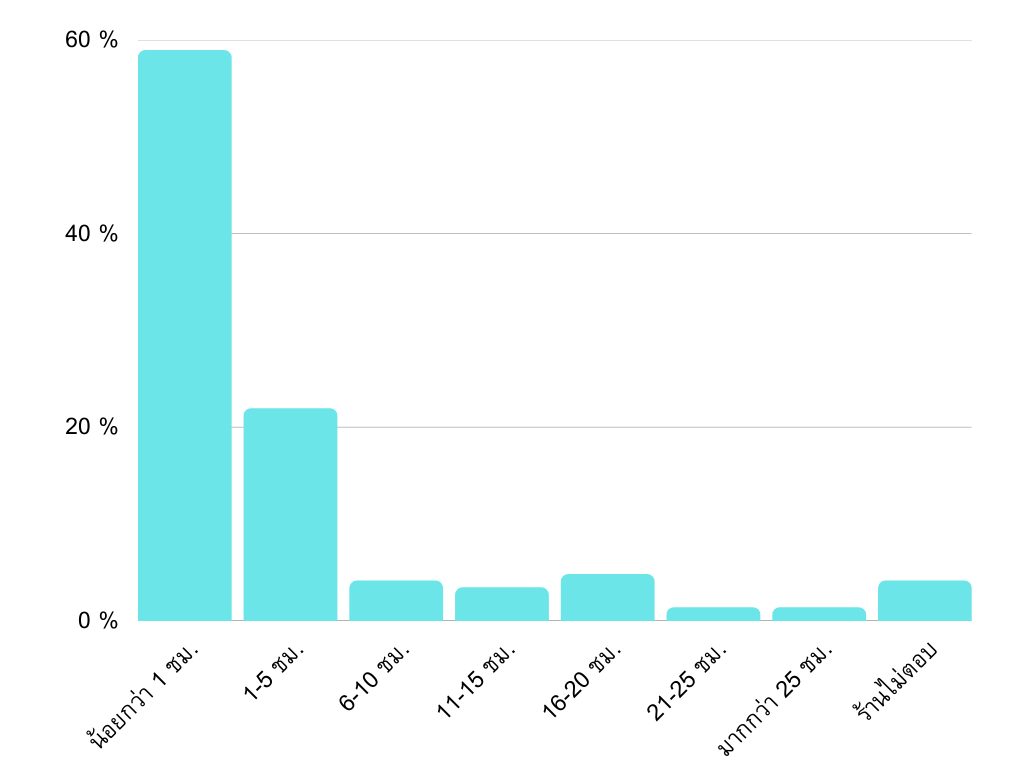

In [79]:
#ระยะเวลาการตอบแชท
Image(filename="/content/drive/MyDrive/HCD:ผลิตภัณฑ์บำรุงเส้นผม/ข้อมูล/ใช้/time.png")

จากกราฟเรามีการแบ่งเวลาเป็นช่วงๆ และมีเปอร์เซ็นต์ของการตอบในแต่ละช่วงเวลาดังต่อไปนี้
- น้อยกว่า 1 ชั่วโมง 58.9%
- 1 ถึง 5 ชั่วโมง 21.92%
- 6 ถึง 10 ชั่วโมง 4.11%
- 11 ถึง 15 ชั่วโมง 3.42%
- 16 ถึง 20 ชั่วโมง 4.79%
- 21 ถึง 25 ชั่วโมง 1.37%
- มากกว่า 25 ชั่วโมง 1.37%
- ร้านไม่ตอบ 4.11%

และจากการดูบทสนทนาในแชทประกอบพบว่ามีลูกค้าบางคนที่บอกว่าไปซื้อเพจอื่นแล้วเพราะว่าตอบกลับช้า ขีดจำกัดในการรอของลูกค้าแต่ละคนไม่เท่ากันบางคนอาจจะอยากได้การตอบกลับแบบทันท่วงที ซึ่งในเพจนี้ยังไม่ได้มีการใช้แชทบอท ลูกค้าอาจจะเลือกซื้อสินค้าในเพจที่พร้อมให้บริการอยู่ตลอด

หากสาเหตุอยู่ที่เพจไม่ค่อยมีการเคลื่อนไหวและตอบลูกค้าช้าเป็นคำตอบของปัญหานี้จริง รวมถึงเรื่องราคาที่สูงตามที่เราได้ทราบจากการแชทของลูกค้า เราจึงได้ลองหาข้อมูลเพิ่มเติมเกี่ยวกับสินค้าชนิดเดียวกันที่ขายในท้องตลาด ว่าราคามีผลต่อความสนใจลูกค้ามากน้อยขนาดไหนและแต่ละเพจมีจุดเด่นยังไงในการดึงลูกค้า


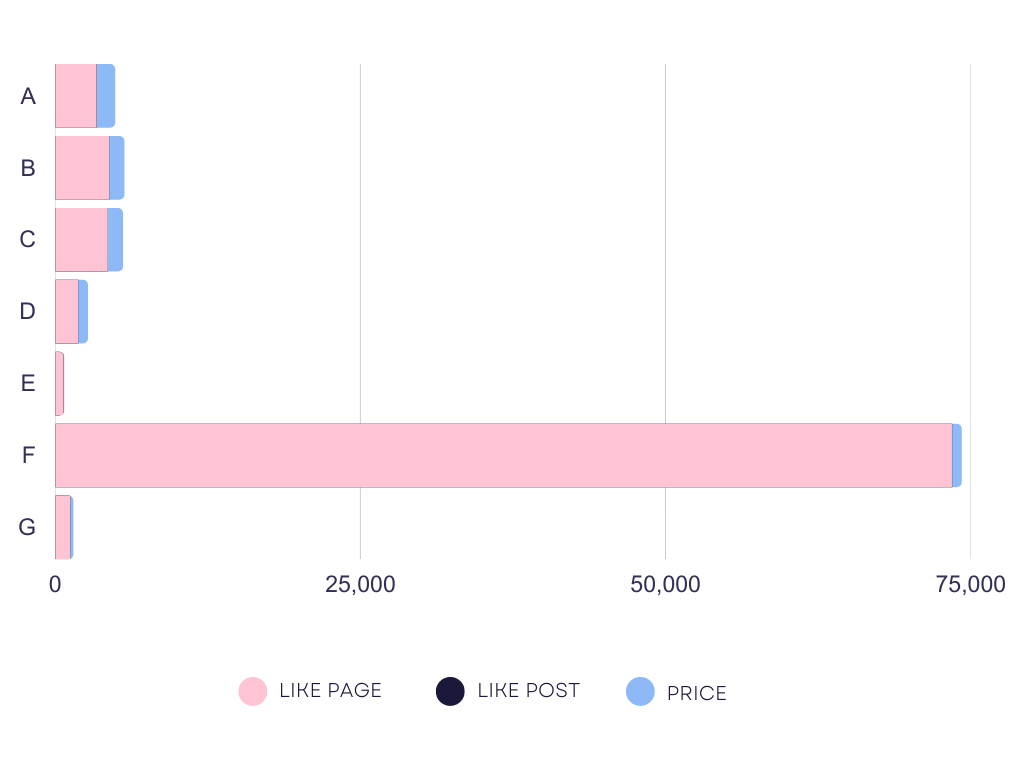

In [81]:
#เพจอื่น
Image(filename="/content/drive/MyDrive/HCD:ผลิตภัณฑ์บำรุงเส้นผม/ข้อมูล/ใช้/brand.png")

เราได้หาตัวอย่างผลิตภัณฑ์มา 7 แบรนด์ ตั้งแต่ราคาต่ำจนถึงราคาสูง และยอดไลก์ของเพจตั้งแต่ต่ำไปจนเพจที่มียอดไลก์สูง โดยจะใช้การมีปฏิสัมพันธ์ของลูกค้าเป็นตัววัดก็คือการกดไลก์โพสต์ของเพจนั้นๆ พบว่าแบรนด์ F มีลูกค้าให้คววามสนใจมากที่สุดตั้งแต่ยอดกดไลก์เพจรวมไปถึงความสนใจในโพสต์และราคายังงต่ำกว่าแบรนด์อื่นๆส่วนใหญ่ ดังนั้นเรื่องราคาสินค้าจึงน่าจะมีผลต่อการตัดสินใจซื้อ